# Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Complete all of the tasks. 
- Make sure your code is readable, organised, and commented appropriately.

---

## Task 1 - Code review

This task is to write a code review, *not* to write python code to solve the problem brief.  

A colleague has been asked to write a program to calculate a root of a continuous function using the **bisection method** as described in the following brief:

---

### Brief

The bisection method is a simple numerical technique to find a root of a continuous function in an interval where this function changes sign. According to [Intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), the continuous function $f=f(x)$ has at least one root in the interval $[a, b]$, if $f(a)f(b) \leq 0$. Utilising this fact, the following 3-step algorithm will find the root of such function within a desired accuracy:

1. Calculate the midpoint $c = (a+b)/2$ and evaluate the function at this point $f(c)$.
2. If $ (b-a)/2 < \epsilon_1 $ or $|f(c)| < \epsilon_2 $, then return $c$ as the root and stop. 
3. Otherwise, depending on the sign of $f(c)$ replace either $a$ or $b$ with $c$, such that $f(a)f(b) < 0$ for the new $a$ and $b$. Then go to step 1.

The criteria introduced in step 2 ensures the difference between the answer and the real root to be less than $\epsilon_1$ or _that_ the function value at the answer is smaller than $\epsilon_2$ (so it can be considered an approximate root). You are supposed to write a function that takes $a$, $b$, $\epsilon_1$ and $\epsilon_2$ as inputs and returns a root using the bisection method. 

Note that the bisection method does not guarantee or detect a change of sign in an interval if the two end points have similar signs. Hence, your program should first search for some subinterval where the function changes sign. This can be achieved by halving the intervals consecutively until in one of the smaller subinterval the function changes sign. If no such an interval is found while the size of the smallest interval is still bigger than $\epsilon_1$, the function returns 'None' and prints out "failed to find a root". 

Test your code for a continuous function on a given interval.  

### Your task:

You have been asked to write a review of their code. Here is the code they wrote:

In [1]:
from math import *

def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(0,2,.0001,0.00001)
print('the root is', my_root)

1.0
the root is 1.0


In [2]:
# Test for x^2-5x+4 from 2 to 3 
my_root = root_finder(2,3,.0001,0.00001)
print('the root is', my_root)

[2.0, 2.5, 3.0]
2.25
the root is 2.25


In [3]:
# Test for x^2-5x+4 from 0 to 3 
my_root = root_finder(0,3,.0001,0.00001)
print('the root is', my_root)

1.5
the root is 1.5


In [4]:
# Test for x^2-5x+4 from 1 to 4
my_root = root_finder(1,4,.0001,0.00001)
print('the root is', my_root)

the root is 1


You should write your review here. 
Things you could choose to discuss:
- Code structure 
- Code style
- Does it answer the brief?
- Does it work? If not_,_ could it be fixed?
- Can you explain what it does?

Keep your answer relatively brief (approx. 500 words).

### Answer:

- Code structure and style

 Most of this code is to check the condition. So, there exist 'if' statements.

 To compute repeatedly when (findinterval == 0) and ( (b-a)/n > eps1) is true, it takes 'while' loop.
 
 To find subinterval related to a + i*(b-a)/n, where a, b and n are given data and changing i from 0 to n+1, it take 'for' loop.

- Does it answer the brief?

 When I run root_finder(0,2,.0001,0.00001), it is quite brief. However, When I run root_finder(2,3,.0001,0.00001), it prints subinterval, c and 'the root is _sth_'.



- It does not work properly. There are some problems in this function. 

(1) When I run root_finder(2,3,.0001,0.00001), it returns that 'the root is 2.25'. However there is no root in interval [2,3]. So, we need to change it as returning "None" and print "fail to find a root".  We could change it as adding some code in the first while loop. In that while loop, there is a 'for loop' and in 'for loop' there is an 'if statement'. In 'if statement', we assign new values a and b, but we do not check that f(a) * f(b) is positive or negative. So, we need the code to check it. I added

         if ff(a) * ff(b) < 0:      
             findinterval = 1.0

under where we assign new variables a and b to check that  ff(a) and ff(b) have different signs. If they have different signs, we assign findinterval is 0. If not, running while loop again and at the end we get None and print "fail to find a root"


(2) When I run root_finder(0,3,.0001,0.00001), the error between real root and return value is quite big. For example, we can get a root as 1 in interval [0,3], but when I run the code it says that the root is 1.5. There exists a quite big error. So, we need to change it in order to get reasonable root. We could change it as adding abs() in 'if statement' in the second 'while loop'. Actually, we have if (ff(c)<eps2):, but we have to change it as if (abs(ff(c))<eps2): to get accurate root. In the brief instruction above the root_finder function, it says that $|f(c)| < \epsilon_2 $. So, we have to change it in order to get accurate root. For example, when I run root_finder(0,3,.0001,0.00001), we get 1.5. On the other hand, when I run root_finder_modified(0,3,.0001,0.00001), we get 1.000030517578125.


(3) Interval which starts with one of the roots or ends with one of the roots or both.

 When I run root_finder(1,4, eps1, eps2), it returns only 4. However in real world, we could easily find that x^2-5x+4 = 0 has two roots as 1 and 4. So, I want to get 2 roots in this function. I could change the code to get two roots. In 'if statement' related to (findinterval == 1), we could add some conditions to get two roots. When both abs(ff(a)) and abs(ff(b)) are smaller than eps2, it means that a and b are roots. If one of them is smaller than eps2, it is a root and we have to find if there is another root in this interval. To check this, I recall the function again. For example, when I run root_finder_modified(0,4, eps1, eps2) there are two roots 1 and 4 in this interval. So making code for returning 4 if abs(ff(4)) < eps2 and find another root as x = root_finder_modified(0,(0+4)/2,eps1, eps2). At the end of this conditional statement, it should return x and b.


(4) In the first 'while loop', we have to change 'for j in range(n): ' to 'for j in range(2):'. The reason is that when we run root_finder(0,10, eps1, eps2), it has an error like "out of range". Above this line, we assign n as n * 2. So we have to change n to 2.

In [5]:
from math import *

def root_finder_modified(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        #print(subintervals)
        n *= 2
        for j in range(2):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                
                #(1)
                #When ff(a) and ff(b) have different signs, assign findinterval as 1
                #If not, looping again in 'while' and there is no interval to get different signs,
                #we have to return None and print "failed to find a root"
                
                if ff(a) * ff(b) < 0:  
                    findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        #(3)
        if (abs(ff(a))<eps2) and (abs(ff(b))<eps2): # check if a or b are roots:
            return a, b
        elif (abs(ff(a))<eps2):
            x = root_finder_modified((a+b)/2,b,eps1,eps2)
            return a, x
        elif (abs(ff(b))<eps2):
            x = root_finder_modified(a,(a+b)/2,eps1, eps2)
            # print(b)
            return x, b
        while ((b-a) > eps1): 
            c = (a+b)/2
            #print(c)
            if (abs(ff(c))<eps2):  #(2) in this line, i added abs() function
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder_modified(0,2,.0001,0.00001)
print('the root is', my_root)

the root is 1.0


In [6]:
# Test for x^2-5x+4 from 2 to 3 
my_root = root_finder_modified(2,3,.0001,0.00001)
print('the root is', my_root)

failed to find a root
the root is None


In [7]:
# Test for x^2-5x+4 from 0 to 3 
my_root = root_finder_modified(0,3,.0001,0.00001)
print('the root is', my_root)

the root is 1.000030517578125


In [8]:
# Test for x^2-5x+4 from 1 to 4
my_root = root_finder_modified(1,4,.0001,0.00001)
print('the root is', my_root)

the root is (1, 4)


---

## Task 2 - Traffic Modelling

### Task 2a - update rule

For this task, you will work on a model of road traffic using discretised cells, which is an example of a larger class of models in computer science called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton). Imagine a road that is divided into a number of cells which can contain only one car. For now, let's assume this road is one-way from left to right. We also discretise time into steps. At each step a car moves to its adjacent right cell if it is empty; otherwise, it stays where it is (see the figure below). 

![](schematicroad.png)

We use a periodic boundary condition such that a car that moves off the right-most cell enters into the left-most cell as shown by the red arrow in the schematic above (if you like you can think of this problem as representing a roundabout rather than a straight section of a road).

You should write a function that finds the position of cars in the next step given their positions in the current step. To do this systematically, we can define the numpy array `R[i,t]` that is 0 if there are no cars in the "`i`" section of the road, and 1 if a car is present at that section for the time step "`t`". "`i`" varies from 1 to $N$ (the total number of cells), and "`t`" varies from 0 to $T$. The new value `R[i,t+1]` depends on its old value at time $t$ (i.e. `R[i,t]`), and also on the old values of the neighbours (`R[i-1,t]` and `R[i+1,t]`). You might think about how you would fill out the tables below (on paper - no need to edit the table in your file) to use them to get an explicit form of the update rules (note we use notation here that `R[i,t]` is the same as $R^t(i)$ below):

![](tables.png)


To test your update function you can use the following example of a road with 9 cells. If we label the cars by their initial cell position, this demonstrates how they move in the next three steps. 

![](roadexample.png)

The array `R`, for this example, becomes 

$$
\left(\begin{array}{cccc}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
\end{array}\right)
$$

Throughout this project, let's denote the total number of cells by $N$, the total number of cars by $M$ and the final time step by $T$.

For the first part of this task you should write code to perform each of the following sub-tasks or markdown text to answer any discussion questions:

1) Write a function **`updateR(R[i,t])`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

In [9]:
### 2a - 1

import numpy as np

R = np.array([[1,0,0,1,1,1,0,0,1]])


# Making updateR() function to get when time is t+1
# Thinking as a row and at the end I will change it to column vector using np.transpose


def updateR(R):
    '''
    Return new R related given R
    '''
    n_col = R.shape[1]         # the number of columns in matrix R
    new_row = []               # to make an output as a new row of R, I made a empty list.
                               # and I will append the values which I have got to new_row
        
    for i in range(n_col):     # repeat it as much as n_col
        R_r = R[0]             # extract the first row from R as R_r
        

    # I divided into 3 conditions to check the conditions and find the right value
    # using the table, I could divide the condition easily.
    
        if i == 0:
            if R_r[i] == 1 and R_r[i+1] == 1:
                new_row.append(1)
            elif R_r[i] == 1 and R_r[i+1] == 0:
                new_row.append(0)
            elif R_r[i] == 1 and R_r[-1] == 1:
                new_row.append(1)
            elif R_r[i] == 0 and R_r[-1] == 0:
                new_row.append(0)
            elif R_r[i] == 0 and R_r[-1] == 1:
                new_row.append(1)
                
                
        elif 0 < i < n_col - 1:
            if R_r[i] == 0 and R_r[i-1] == 0:
                new_row.append(0)
            elif R_r[i] == 1 and R_r[i+1] == 0:
                new_row.append(0)
            elif R_r[i] == 1 and R_r[i+1] == 1:
                new_row.append(1)
            elif R_r[i-1] == 1:
                new_row.append(1)
                
                
        elif i == n_col-1:
            if R_r[i] == 1 and R_r[0] == 0:
                new_row.append(0)
            elif R_r[i] == 0 and R_r[i-1] == 0:
                new_row.append(0)
            elif R_r[i] == 1 and R_r[0] == 0:
                new_row.append(0)
            elif R_r[i] == 1 and R_r[0] == 1:
                new_row.append(1)
            elif R_r[i] == 0 and R_r[i-1] == 1:
                new_row.append(1)
    
    rr = np.array([new_row])  # to make a matrix, do np.array()
    

    return rr

In [10]:
# using updateR() function, we can make a matrix.
def making_matrix(R,t):
    '''
    making a matrix of given R and stack it into the original.
    repeat as much as t times.
    '''
    
    R2 = np.copy(R)            # not to lose the R, copy it as R2
    
    for i in range(t):         # test integer i from 0 to time t
        R = updateR(R)         
        R2 = np.row_stack((R2,R))  # stack R into R2
        
    return np.transpose(R2)  
# to get the same matrix, I did transpose it.
# The reason is that as I have already mentioned, I think it as a row vector not column.
# So, I have to transpose it.

r2 = updateR(R)

# test when t = 10
print(making_matrix(R,10))

[[1 0 1 0 1 1 0 1 0 1 0]
 [0 1 0 1 1 0 1 0 1 0 1]
 [0 0 1 1 0 1 0 1 0 1 0]
 [1 1 1 0 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 0 1 0 1 1]
 [1 0 1 0 1 0 1 0 1 1 0]
 [0 1 0 1 0 1 0 1 1 0 1]
 [0 0 1 0 1 0 1 1 0 1 0]
 [1 1 0 1 0 1 1 0 1 0 1]]


2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

In [11]:
### 2a - 2

def is_prime(n):
    """
    Return whether an input positive integer is prime.
    """
    
    if n == 1:        # If n is 1 ...
        return False  # ... then n is not prime
    
    for i in range(2, n):  # Test integers i from 2 to n - 1 inclusive
        if n % i == 0:     # If n is divisible by i ...
            return False   # ... then n is not prime
    # If n is not divisible by any integers from 2 to n - 1 inclusive then n is
    # prime
    return True

# is_prime(n) : from Numerical Linear Algebra project1

In [12]:
def make_new_R(N):
    '''
    making a matrix with length N
    put 1 when it is prime number
    '''
    row = np.zeros(N)   # making a vector with N zeros 
    for i in range(N):
        if 39 < i <= 54:   # in (40, 55] interval we put the value 1
            row[i] = 1
        else:
            if is_prime(i+1) == True:  # using is_prime function and index should be i+1 
                                       # (reason : python starts with 0)
                row[i] = 1
            else:
                row[i] = 0
        
    #print(row)
    
    return row



# test the function with N = 100 and T = 400
row = np.array([make_new_R(100)])
M_R = making_matrix(row,400)
print(M_R)

[[0. 0. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

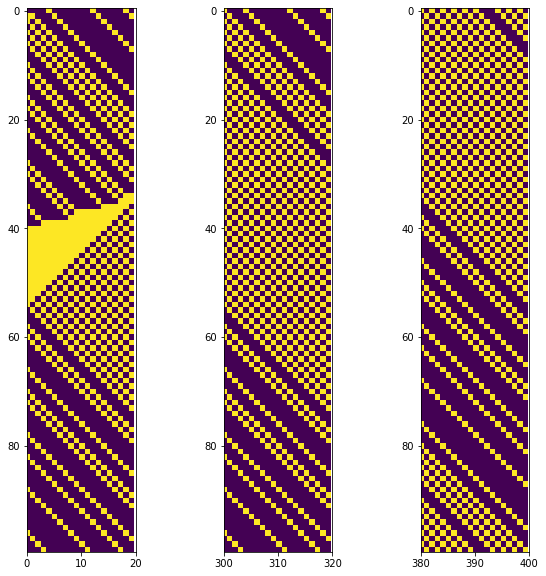

In [14]:
### 2a - 3

# drawing plots given data
import matplotlib.pylab as plt 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))
# subplot(nrows, ncols, index, **kwargs)

# first I sliced the interval which I want to see. (e.g. ax1.imshow(M_R[:,:20]))
# to change the x-axis values, I took set_xlim(starting point, ending point)
ax1.imshow(M_R[:,:20])
ax1.set_xlim(0,20)

ax2.imshow(M_R[:,:320])
ax2.set_xlim(300,320)

ax3.imshow(M_R[:,:400])
ax3.set_xlim(380, 400)

plt.show()


#set_xlim : https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib

---

### Task 2b - Trajectory of the cars and average velocity

Storing `R[i,t]` at each time step is unnecessarily memory-consuming. Moreover, it is hard to track individual cars through the zeros and ones of `R[i,t]`. Instead, it is more efficient for many purposes to store the trajectories of each car in an array, `Traj[car,t]`, where each row records the trajectory for a different car, with the value in each successive column recording the location at each successive time step. Our next purpose is to use this array to calculate the average velocities of each car. So it is now better not to use the periodic boundary condition immediately, but to store the value of $N+1$ for the car that moves off the last cell (similarly storing the value of $N+2$ instead of 2 etc). For instance, for the 9-cell road shown in the previous figure `Traj` is constructed as below:

$$
\left(\begin{array}{ccc}
1 & 2 & 3 & 3\\
4 & 4 & 4 & 5\\
5 & 5 & 6 & 7\\
6 & 7 & 8 & 9\\
9 & 9 & 10& 11\\
\end{array}\right)
$$

To derive `Traj[:,t+1]` from `Traj[:,t]`, we only need the current column of `R` and not the entire matrix `R[0:N,0:t+1]`. Hence, we are going to only keep the vector `r[0:N]`, which is the current state of the road with empty cells represented by 0 and cells with a car by 1 (i.e. `r=R[:,t]`). Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`. 

Using `Traj[:,t+1]` and [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) you can update `r` more easily. To update `r` from the state at `t` to `t+1` you will need to: 

- start a new array for `r` at `t+1` by filling `r[:]` values as zeros initially
- take each element of `Traj[:,t+1]`
- find the remainder when you divide that element by $N$, call it `j`
- set `r[j-1]=1`.

(Note what is happening here - you are storing the cars in cells 1 up to N in array positions indexed 0 up to N-1).

Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`.   

Using the functions you have written; **`new_position()`**, **`new_updateR()`** and **`ave_vel()`**, complete the following list of tasks:


1) Test your function **`new_position()`** by using the example above.

2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

In [15]:
### 2b - 1
### Making new_position() function

import numpy as np

def new_position(r, Traj):
    '''
    Take a matrix with one row(r) and another matrix with one row(Traj)
    Return the new trajectory position Matrix with one row
    '''
    n_row = r.shape[1]              # the number of columns of r
    n_Traj = Traj.shape[1]          # the number of columns of Traj
    new_traj = np.zeros(n_Traj)     # making zero vector with same size as Traj
    
    for i in range(n_Traj):             # test i integer from 0 to n_Traj
        j = int(Traj[0,i] % n_row - 1)  # assign new value 'j' to find the index of the position
        
        if j == - 1:                    
            if r[0,0] == 1:
                new_traj[i] = Traj[0,i]
            else:
                new_traj[i] = Traj[0,i] + 1
                
        # When we test the last value of column(j = -1)
        # there are two conditions related to the first value of column
        # (1) When the first value of column is 1, we could not move. 
        # So, we have to take the same value of previous one
        # (2) When the first value of column is 0, we could move forward.
        # So, we have to add 1.
        
        
        else:
            if r[0,j+1] == 0:
                new_traj[i] = Traj[0,i] + 1
            else:
                new_traj[i] = Traj[0,i]
                
        # When next value is 0, we could move forward. => adding 1
        # If not, just taking previous value
      
    
    new = np.stack((Traj[0], new_traj))
                
    return np.array([new[-1,:]])

r = np.array([[1,0,0,1,1,1,0,0,1]])
Traj = np.array([[1,4,5,6,9]])
print(new_position(r,Traj))

[[2. 4. 5. 7. 9.]]


In [16]:
### making new_updateR function

Traj_t = new_position(r, Traj)

def new_updateR(Traj_t):
    '''
    Using new_position function, return the column related to the return value of function 'new_position()'. 
    '''
    
    new_r = np.zeros(r.shape[1])
    final_r = np.array([new_r])
    
    for i in range(Traj_t.shape[1]):
        value = Traj_t[0,i]            # taking each value of Traj_t and assign to 'value'
        j = int(value % r.shape[1])    # to find the index of new r, I used modulus.
        final_r[0,j-1] = 1             
        # changing jth index of final_r as 0 to 1. In python it starts with 0, put index j-1 instead of j
    
    return final_r

print(new_updateR(Traj_t))

[[0. 1. 0. 1. 1. 0. 1. 0. 1.]]


In [17]:
### making whole matrix of Trajectory

import numpy as np

def Matrix_Traj(r, Traj, t):
    '''
    return matrix until time t with r and Traj 
    which are obtained by new_updateR and new_position, respectively
    '''
    copy_r = r          # not to lose the original r, I assign it as 'copy_R'
    copy_Traj = Traj
    
    for i in range(t-1):
        Traj = new_position(r, Traj)  
        r = new_updateR(Traj)
        
        copy_Traj = np.row_stack((copy_Traj, Traj))
        # to make a matrix, stack it as row.
        # and return the matrix with transpose matrix
    
    
    return np.transpose(copy_Traj)


r = np.array([[1,0,0,1,1,1,0,0,1]])
Traj = np.array([[1,4,5,6,9]])


# test the function Matrix_traj until time t = 7
M_Traj = Matrix_Traj(r, Traj, 7)
print(M_Traj)

[[ 1.  2.  3.  3.  4.  5.  6.]
 [ 4.  4.  4.  5.  6.  7.  8.]
 [ 5.  5.  6.  7.  8.  9.  9.]
 [ 6.  7.  8.  9. 10. 10. 11.]
 [ 9.  9. 10. 11. 11. 12. 13.]]


In [18]:
### making ave_vel function

def ave_vel(Traj, t):
    '''
    Return the average value of velocity with Traj and time t.
    1. finding difference between time t+1 and t.
    2. finding average by np.mean().
    3. appending the #2 value to list which I made.
    
    The elements of return value cannot become bigger than 1.
    (Reason :  when we do #1, the values we get is 0 or 1. And computing the average, 
    it should not be bigger than 1. The maximum value is 1.)
    '''
    
    col_vel = []        # to append the value, I make a empty list.
    
    for i in range(t-1):
        Traj_b = Traj[:,i]
        Traj_t = Traj[:,i+1]
        vel = np.array([Traj_t - Traj_b])
        
        col_vel.append(np.mean(vel))
    
    
    return col_vel

# test a function ave_vel() with using M_Traj and time = 7
av_velo = ave_vel(M_Traj, 7)
print(av_velo)

[0.4, 0.8, 0.8, 0.8, 0.8, 0.8]


2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

In [19]:
### 2b - 2

N = 50
M = 15
T = 50

def new_R(N,M):
    '''
    Input : two integer N and M
    Return a Matrix with one row and N columns which is that the first fifteen cells(M) are 1.
    '''
    row = np.zeros(N)
    
    # to make the first fifteen cells(M) as 1, repeat as much as M and assign 1.
    for i in range(M):
        row[i] = 1
    
    return np.array([row])

r = new_R(N,M)
print(r)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [20]:
def making_f_Traj(M):
    '''
    Retrun the first Trajectory with size M
    '''
    row = np.zeros(M)
    for i in range(M):
        row[i] = i+1    # Due to python indexing, it should add 1.
    
    return np.array([row])
        
F_Traj = making_f_Traj(M)
print(F_Traj)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]]


In [21]:
def modified_M_Traj(r, F_Traj, T):
    '''
    Return new whole matrix with r and F_Traj.
    r-value is obtained from new_R(N,M) and F_Traj-value is obtained by making_f_Traj(M)
    T is how much time we want to observe.
    '''
    
    r2 = r
    F_Traj2 = F_Traj
    
    F_Traj = new_position(r, F_Traj)
    r = new_updateR(F_Traj)
    s = np.row_stack((F_Traj2, F_Traj))
    
    
    for i in range(T-2):        
        # above 'for loop', we get a matrix with two rows. => repeat as much as T-2
        
        F_Traj = new_position(r, F_Traj)
        r = new_updateR(F_Traj)
        s = np.row_stack((s, F_Traj))
        
    return np.transpose(s)

    # I think it as a row vector, but in question we consider it as column vector.
    # That is the reason I take np.transpose()


a = modified_M_Traj(r, F_Traj, T)
#print(a)

# test the function ave_vel()
aver_velo = ave_vel(a, N)
print(aver_velo)

[0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


###### comments
When the element of ave_vel is 1, it means that every car is moving.
When the element of ave_vel is 0, it meant that no car is moving.

In [22]:
### Making function for drawing plots


# To draw a plot easily, I make a function  as input N,M and T to compute ave_vel value 
# using new_R, making_f_Traj and modified_M_Traj functions.
def MNT_func(N,M,T):
    '''
    Return the value of ave_vel() function with inputs N, M and T.
    '''
    r = new_R(N,M)
    F_Traj = making_f_Traj(M)
    m = modified_M_Traj(r, F_Traj, T) 
    average_v = ave_vel(m, T)
    
    return average_v

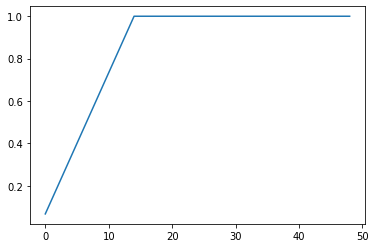

In [23]:
import matplotlib.pylab as plt 

M = 15
N = 50
T = 50

v = MNT_func(N,M,T)     # we can compute easily with above function which I defined.

plt.plot(range(T-1),v)  # python indexing (T-1)
plt.show()

#### Q. How long does it take to reach a steady average speed?

To reach steady average speed, it takes around t = 13. We can easily find the point with above graph which I draw. Before around t = 13 or 14, the average speed is increasing. It means that much more cars could move forward. When t = 13 or 14, i.e. around t = 13, the average velocity reaches 1. It means every car moves forward after around t = 13.

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

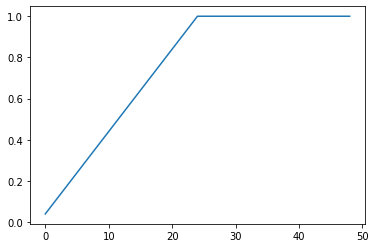

In [24]:
### 2b - 3 (When M = 25)

M = 25
N = 50
T = 50

v = MNT_func(N,M,T)

plt.plot(range(T-1), v)
plt.show()

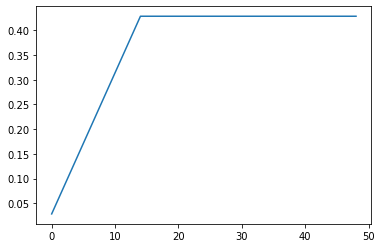

In [25]:
### 2b - 3 (When M = 35)

M = 35
N = 50
T = 50

v = MNT_func(N,M,T)

plt.plot(range(T-1), v)
plt.show()

#### Q. Is the final average speed the same for all $M$?

Actually, it is not. When M = 15 and 25, they reach the final average speed as 1. On the other hand, when M = 35, it reaches around 0.5 for the final average speed. 

#### Q. Which is the largest value of $M$ for which you can reach the maximum average speed?

M = 25 to get maximum average velocity. When we have M greater than 25, it could not reach 1 as the maximum average speed. It means that we have 50 size of road(N). To get the traffic smoothly (to reach the final average speed 1), the number of maximum cars should be half of the road size like binary. Therefore, M = 25 i the largest value to reach the maximum average speed.

4) Does the average speed of the cars depend on their initial configuration? To answer this question, initally fill $M = 20$ cars in $N=50$ cells in three different ways:

a) Fill the first 20 cells with 20 cars.

b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,... 

Plot the average speed of the cars as a function of time up to $T=50$ for each case and discuss the results.

5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

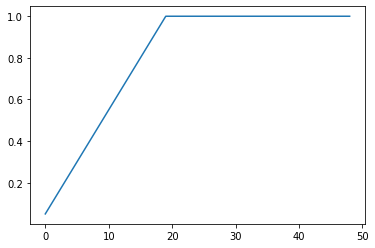

In [26]:
### 2b - 4 - a

N = 50
M = 20
T = 50

v = MNT_func(N,M,T)

plt.plot(range(T-1),v)
plt.show()

In [27]:
### 2b - 4 - b

import random
import matplotlib.pylab as plt 

N = 50
M = 20
T = 50

# making a function to find random matrix r with size N and M number of cars.
def rand_car(N,M):
    '''
    Return matrix r with one row.
    Take integers N(number of cells) and M(number of cars on the road).
    '''
    
    r = np.zeros(N)      # make a vector with 0 elements and we will replace it to 1 some specific value.
    rand_index = random.sample(range(0,N),M) 
    # make random index with size M and get value of each element is between 0 to N-1
    
    for i in range(M):
        j = rand_index[i]  # to make a r matrix, we have to find the index for car position.
        r[j] = 1           # replace j-th value of r to 1


    return np.array([r])

a = rand_car(N,M)
print(a)

[[1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
  1. 1.]]


In [28]:
# making a function to find the random matrix of traj related to matrix of random car r.
def rand_car_traj(r, M):
    '''
    Return trajectory matrix with one row based on matrix of random car r
    '''
    
    n_r = r.shape[1]
    rand_traj = []     # make an empty list to get the value of trajectories.
    
    for i in range(n_r):
        if r[0,i] == 1:
            rand_traj.append(i+1)  # due to python indexing, we have to add 1
        
    return np.array([rand_traj])

b = rand_car_traj(a, M)
print(b)

[[ 1  3  4  6  7 16 21 23 24 31 35 36 38 39 41 42 46 48 49 50]]


In [29]:
# make a function to compute easily
def rand_car_total(N,M):
    '''
    Input as integers N and M
    Return the values of given functions rand_car() and rand_car_traj()
    '''
    
    rand_r = rand_car(N,M)
    rand_traj = rand_car_traj(rand_r,M)
    
    return rand_r, rand_traj


rand_r, rand_traj = rand_car_total(N,M)
print("rand_r :\n {}".format(rand_r))
print("rand_traj :\n {}".format(rand_traj))

rand_r :
 [[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 1.]]
rand_traj :
 [[ 4  9 10 11 12 13 15 16 18 20 21 26 29 36 37 39 42 43 45 50]]


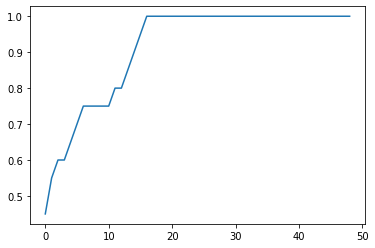

In [30]:
### making a plot

rand_r, rand_traj = rand_car_total(N,M)
a = modified_M_Traj(rand_r, rand_traj, T)
v = ave_vel(a, T)

plt.plot(range(T-1),v)
plt.show()

In [31]:
### 2b - 4 - c
N = 50
M = 20
T = 50

# make a trajectory with pair position.
def traj_pairs(N, M):
    '''
    Return a matrix of trajectory with number of pairs (e.g.[1,2,4,5,7,8,,,,]) as M size.
    '''
    
    pair_list = []  # to append new values, make an empty list.
    
    for i in range(1,N,3):        
        # test an integer i from 1 to N with 3 steps
        # 1,4,7,,,,, and we will append i and i+1 value.
        
        if len(pair_list) < 20:   # we have to get the value which is length of M
            pair_list.append(i)
            pair_list.append(i+1)

        
    return np.array([pair_list])


pairs = traj_pairs(N, M)
#print(pairs.shape[1])
print(pairs)

[[ 1  2  4  5  7  8 10 11 13 14 16 17 19 20 22 23 25 26 28 29]]


In [32]:
# make a function for changing trajectory matrix to r matrix.
def traj_2_r(N, pairs):
    '''
    Return the value of Matrix r with one row using N and pairs which is obtained by traj_pairs() function.
    '''
    
    r_array = np.zeros(N)   # making an array with zeros which has length N.
    m = pairs.shape[1]

    for i in range(m):
        j = pairs[0,i]      # get a value j which is the element of pairs.
        r_array[j-1] = 1    # replace 0 to 1 in j-1 th index of r_array
        
    return np.array([r_array]) 

    
car_pairs = traj_2_r(N, pairs)   
print(car_pairs)

#matrix = Matrix_Traj(car_pairs, pairs, T)

[[1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
  1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [33]:
# make a function to draw a plot easily with data which is related to 'pairs'
def to_pairs(N,M,T):
    '''
    Take the values of N, M, and T and return the average velocity of pairs.
    '''
    
    pairs = traj_pairs(N, M)
    car_pairs = traj_2_r(N, pairs)
    a = modified_M_Traj(car_pairs, pairs, T)
    v = ave_vel(a,T)
    
    return v

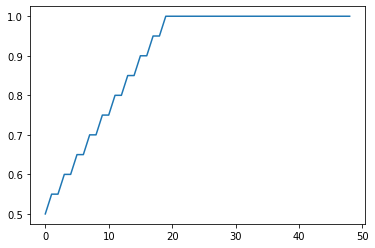

In [34]:
v = to_pairs(N,M,T)    # we can get average velocity easily when we use to_pairs() function.

plt.plot(range(T-1),v)
plt.show()

- (a), (b) and (c) reach the final average speed as 1.
- There are difference between how much time to reach the final average speed.

(a) It takes T = 20 to reach it and before reaching it, it increases linearly.

(b) It is a random sample, so I could not say the specific things. However, it does not take more than T = 20 to reach the final average speed. And sometimes it increases as shape of stairs.

(c) It is pairs data. Due to pairs data, the graph looks like steps. There are 10 steps to reach the final average speed. And it takes around T = 20 to reach the final average speed.

5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

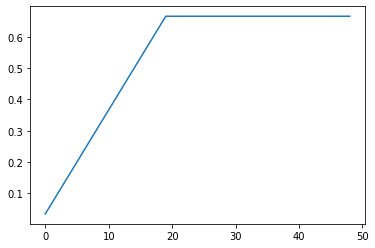

In [35]:
### 2b - 5 - a

N = 50
M = 30
T = 50

v = MNT_func(N,M,T)

plt.plot(range(T-1),v)
plt.show()

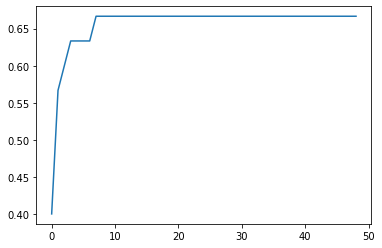

In [36]:
### 2b - 5 - b

rand_r, rand_traj = rand_car_total(N,M)
a = modified_M_Traj(rand_r, rand_traj, T)
v = ave_vel(a, T)

plt.plot(range(T-1),v)
plt.show()

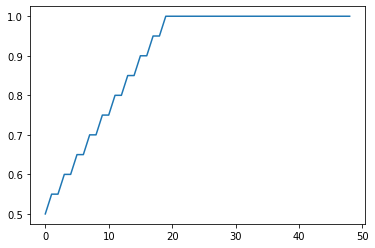

In [37]:
### 2b - 5 - c (pairs)

v = to_pairs(N,M,T)

plt.plot(range(T-1),v)
plt.show()

#### Q. Does the average speed reach the same limit?

Actually, not.

- (a) Fill the first 20 cells with 20 cars.

When M = 20, the limit of average speed reaches 1. However when M = 30, the limit of average speed reaches around 0.7. To reach the final average speed as 1, M-value should be one half of size N.


- (b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

Similary, when M = 20 the limit of  reaches 1. On the other hand, when M = 30, it reaches around 0.67.


- (c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,...

Both when M = 20 and M = 30, the limit of average speed reach 1.

6) How does the number of cars affect the final average speed? In other words, we want to see how traffic fluidity depends on how busy the road is. Use `scipy.stats.bernoulli.rvs(p, size=N) ` to fill each cell in the inital configuration (see workshop 5 if you are not familiar with this function). This means the chance of having a car in a cell is `p`.  Therefore, if `N` is large enough, you expect to have `N*p` cars on the road. Set $N=800$, vary `p` from $0.2$ to $0.8$, and plot the average speed of cars at `T=200` as a function of `p`. Comment on the results. How does the number of cars affect their final average speed?

7) Repeat the last question for $N=50$ and $N = 2000$. Do the results change? Why?

In [38]:
import random 
import scipy
from scipy import stats

N = 800
T = 200


# to get a random p value
def define_p(a,b):
    '''
    Input : two values a and b as [a, b] which p could get.
    Return : p value between a and b
    '''
    
    rand_num = random.randrange(a*10,b*10)
    p = rand_num / 10
    # to use random.randrange(x,y), we have to input x and y as an integer not floating point.
    # Therefore, I multiply 10 and when I get randon number between [a*10, b*10], I will divide it by 10 again.
    
    
    return p

p = define_p(0.2,0.8)
#print("p : {}".format(p))    # to show the p value.

ber = scipy.stats.bernoulli.rvs(p, size = N)
ber_matrix = np.array([ber])
#print(ber_matrix)

In [39]:
# a function which is changing r to trajectory
def r_2_traj(r, N):
    '''
    using matrix r and number N, return a trajectory matrix.
    '''
    
    traj_list = []                  # to append new values, make an empty list.
    
    for i in range(N):
        if r[0,i] == 1:
            traj_list.append(i+1)
        # to find index value when the element of r is 1.
        # due to python indexing, we have to append i+1 when i-th value of r is 1.
    
    return np.array([traj_list])


traj_p = r_2_traj(ber_matrix, N)
#print(traj_p)

whole_matrix = modified_M_Traj(ber_matrix, traj_p, T)
#print(whole_matrix)

In [55]:
# to draw plot easily using above functions which we defined.
def to_plot_p(N,T,a,b):
    '''
    Return the average velocity with N, T, and [a,b] 
    using functions define_p(), r_2_traj() which we obtained.
    '''
    p = define_p(a,b)
    ber = scipy.stats.bernoulli.rvs(p, size = N)
    ber_matrix = np.array([ber])
    traj_p = r_2_traj(ber_matrix, N)
    whole_matrix = modified_M_Traj(ber_matrix, traj_p, T)
    v = ave_vel(whole_matrix,T)
    
    return v

# to check : (if `N` is large enough, you expect to have `N*p` cars on the road).
number_Of_cars = np.sum(ber_matrix)

N : 800 
T : 200
p : 0.7
the number of cars on the road : 33
N * p : 560.0


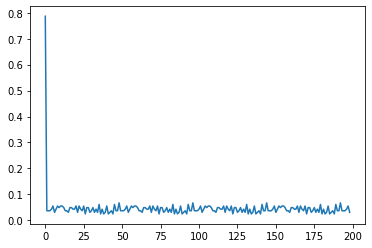

In [76]:
N = 800
T = 200
print("N : {} \nT : {}".format(N,T))
print("p : {}".format(p))
print("the number of cars on the road : {}".format(number_Of_cars))
print("N * p : {}".format(N*p))

# # draw a plot with N = 800 and T = 200
v = to_plot_p(N,T,0.2,0.8)

plt.plot(range(T-1),v)
plt.show()

N : 50 
T : 200
p : 0.4
the number of cars on the road : 18
N * p : 20.0


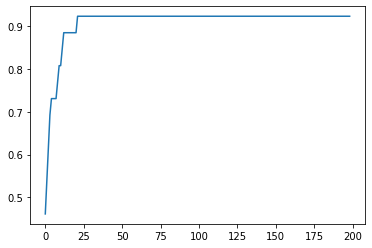

In [78]:
N = 50
T = 200

print("N : {} \nT : {}".format(N,T))
p = define_p(0.2,0.8)
print("p : {}".format(p))

ber = scipy.stats.bernoulli.rvs(p, size = N)
ber_matrix = np.array([ber])
number_Of_cars = np.sum(ber_matrix)
print("the number of cars on the road : {}".format(number_Of_cars))
print("N * p : {}".format(N*p))


# draw a plot with N = 50 and T = 200
v = to_plot_p(N,T,0.2,0.8)

plt.plot(range(T-1),v)
plt.show()

N : 2000 
T : 200
p : 0.3
the number of cars on the road : 561
N * p : 600.0


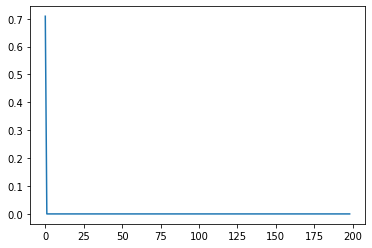

In [83]:
N = 2000
T = 200
print("N : {} \nT : {}".format(N,T))


p = define_p(0.2,0.8)
print("p : {}".format(p))


ber = scipy.stats.bernoulli.rvs(p, size = N)
ber_matrix = np.array([ber])
number_Of_cars = np.sum(ber_matrix)
print("the number of cars on the road : {}".format(number_Of_cars))
print("N * p : {}".format(N*p))


# draw a plot with N = 2000 and T = 200
v = to_plot_p(N,T,0.2,0.8)

plt.plot(range(T-1),v)
plt.show()

#### Q. Do the results change? Why?

We could get the number of cars on the road with similar value of N*p  when N is getting bigger.

And results changed. When N is small (N = 50), the maximun average speed reaches around 0.67. On the other hand, rest of them tend to go zero.

When p(the chance of having a car in a cell) is 0.2 which is relatively small, every car move to forword very well. However when p is getting bigger, there exists traffic jam on our road. The reason is that as p is getting bigger, it means that it has more chance to have cars on the road. So, if there are too many cars on the road, it should have traffic jam.



---

### Task 2c - Fast and slow cars

Now imagine there are two types of cars on our road: fast cars who want to move with the speed of 2 cells per step if there are enough spaces in front of them, and the slow cars who always move with the speed of 1 cell per step as in the previous task. If there are less than two free cells in front of the fast cars, they either move one cell per step or don't move at all (like slow cars).

1) Numbering your cells from $1$ to $N=100$, put all fast cars initially in the prime indexed cells and the cells in the interval $(60,85]$. Now plot the position of the cars in the time interval $t=[0, 60]$. Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?

(You will find it helpful to construct a new function to help **`new_position2(r,Traj,Vel)`**, where the new vector `Vel` stores the velocity of each car).

In [84]:
N = 100
T = 60

import numpy as np

# make a function to represent the speed of each cells
# I modified make_new_R() function in 2a - 2
# I just changed the value 1 to 2, cause we want to know about fast cars
def vel(N):
    row = np.zeros(N)
    for i in range(N):
        if 59 < i <= 84:
            row[i] = 2
        else:
            if is_prime(i+1) == True:
                row[i] = 2
            else:
                row[i] = 0
    
    return np.array([row])

v = vel(N) 
print(v)

[[0. 2. 2. 0. 2. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0. 2. 0.
  0. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0. 2. 0.
  0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
  2. 0. 0. 0.]]


In [85]:
# make a matrix R related to vel(N) function
# If there is an element except 0 in matrix v = vel(N),
# then we assign 1 to corresponding index.
def fast_R(N, vel):
    row = np.zeros(N)
    for i in range(N):
        if vel[0,i] != 0:
            
        # In general, we cannot say vel[0,i] == 2 or sth value.
        # The reason is that it could have different velocity in matrix vel.
        # Therefore, we have to make a condition as 'not 0'
            
            row[i] = 1
    
    return np.array([row])

r = fast_R(N, v)
print(r)

[[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0.]]


In [86]:
# to use r which is obtained by fast_R as above, we could find the trajectory matrix.
# I modified r_2_traj() function in 2b - 4(c)

def r_2_traj_fast(r, N):
    traj_list = []     # make an empty list to append some values.
    
    for i in range(N-1):
        if r[0,i] == 1:               # if there is an 1 as an element,
            traj_list.append(i+1)     # append the index + 1 to empty list. (python indexing)
    
    return np.array([traj_list])

traj_fast = r_2_traj_fast(r, N)
print(traj_fast)

[[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 62 63 64 65 66 67
  68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 97]]


In [87]:
# find new trajectory matrix related to r, Traj, vel
# I modified new_position() function in 2b - 1

def new_position2(r, Traj, vel):
    new_traj = np.zeros(Traj.shape[1])
    
    for i in range(vel.shape[1]):
        for k in range(Traj.shape[1]):
            j = int(Traj[0,k] % r.shape[1] - 1)
            
            # first we have to divide into 2 conditions to find the step related to speed.
            # when speed is 2, it could move 2 steps if possible.
            
            if vel[0, i] == 2:
                
                # The cars with speed 2 can move to forward 2 steps, so we have to consider last two cells.
                # Therefore, I divided it into 3 conditions, 
                # when j == -1 (last cell), when j == r.shape[1]-2 (the second last cell) and rest of them.
                
                if j == -1:
                    
                    if r[0,0] != 0:  
                    # the first cell could be 0 or 1 or 2, we could not specify just one number.
                        new_traj[k] = Traj[0,k]
                    else:
                        if r[0,1] == 0:
                            new_traj[k] = Traj[0,k] + 2  
                        # when the first cell and the second cell are both 0, it could move 2 steps.
                        else:
                            new_traj[k] = Traj[0,k] + 1
                        # when the first cell is 0 and the second cell has value, it could move 1 steps.
                
                
                # now it is similar logic as above.
                elif j == r.shape[1] - 2:
                    if r[0, j+1] != 0:
                        new_traj[k] = Traj[0,k]
                    elif r[0, j+1] == 0 and r[0,0] == 0:
                        new_traj[k] = Traj[0,k] + 2
                    elif r[0, j+1] == 0 and r[0,0] != 0:
                        new_traj[k] = Traj[0,k] + 1
                
                
                else:
                    if r[0,j+1] != 0:
                        new_traj[k] = Traj[0,k]
                    elif r[0, j+1] == 0 and r[0, j+2] == 0:
                        new_traj[k] = Traj[0,k] + 2
                    elif r[0, j+1] == 0 and r[0, j+2] != 0:
                        new_traj[k] = Traj[0,k] + 1
            
            elif vel[0, i] == 1:  # same logic with new_position()
                
                if j == -1:
                    if r[0,0] != 0:
                        new_traj[k] = Traj[0,k]
                    else:
                        new_traj[k] = Traj[0,k] + 1
                
                
                else:
                    if r[0,j+1] == 0:
                        new_traj[k] = Traj[0,k] + 1
                    else:
                        new_traj[k] = Traj[0,k]
    
    new = np.stack((Traj[0], new_traj))
                

            
    return np.array([new[-1,:]])

np2 = new_position2(r, traj_fast, v)
print(np2)

[[ 2.  4.  6.  9. 12. 15. 18. 21. 25. 30. 33. 39. 42. 45. 49. 55. 60. 61.
  62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79.
  80. 81. 82. 83. 84. 87. 91. 99.]]


In [88]:
r = fast_R(N, v)
np2 = new_position2(r, traj_fast, v)

# using new_updateR() function, we could find easily new R.
new_r = new_updateR(np2)
print(new_r)

[[0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]]


In [89]:
# make a function as similar with new_updateR() in 2b - 1.
# This function considers all the speed is 2.
def new_updateR_2(Traj_t):
    
    new_r = np.zeros(r.shape[1])
    final_r = np.array([new_r])
    
    for i in range(Traj_t.shape[1]):
        value = Traj_t[0,i]           
        j = int(value % r.shape[1])    
        final_r[0,j-1] = 2             
    
    return final_r

n_r2 = new_updateR_2(np2)
print(n_r2)

[[0. 2. 0. 2. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0. 0.
  2. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0. 0.
  2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0.
  0. 0. 2. 0.]]


In [90]:
new_r = new_updateR(np2)
new_v = new_updateR_2(np2)

# make a function to get the total matrices
# this function is similar to modified_M_Traj(r, F_Traj, T) function.
def r_v_matrix(v,r,traj,t):
    '''
    Return the whole matrices, vel and r
    '''
    
    # not to lose the data which we are taken.
    v2 = v
    r2 = r
    traj2 = traj
    
    # to make whole matrices, taking some related functions to get the values
    np2 = new_position2(r, traj_fast, v)
    new_r = new_updateR(np2)
    new_v = new_updateR_2(np2)
    stack1 = np.row_stack((v, new_v))
    stack2 = np.row_stack((r, new_r))
    
    for i in range(t-2): 
        
        # we already make a 2 rows outside of for loot,
        # so if I want to get with T rows, repeat T-2.
        # and at the end, to get the matrix with column vectors, I do transpose it.
        
        np2 = new_position2(new_r, np2, new_v)
        new_r = new_updateR(np2)
        new_v = new_updateR_2(np2)
        stack1 = np.row_stack((stack1, new_v))
        stack2 = np.row_stack((stack2, new_r))
    
    stack_v = np.transpose(stack1)
    stack_r = np.transpose(stack2)
    
    return stack_r, stack_v

s_r, s_v = r_v_matrix(v,r,traj_fast, T)

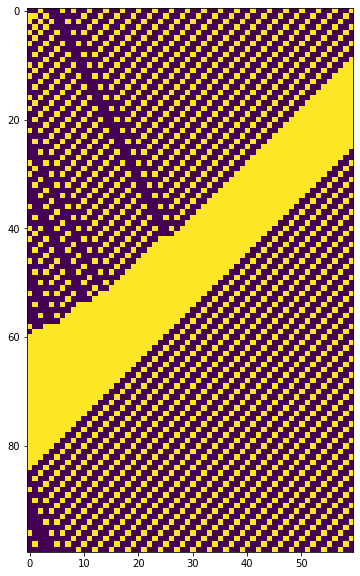

In [91]:
# drawing a plot
import matplotlib.pylab as plt 
fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))

ax1.imshow(s_r[:,:T])

plt.show()

2) Now put fast cars initially in the prime indexed cells only like those in the last question, but this time make the last car (in cell 97) slow (i.e. moving only one cell per step). How does this car affect the whole traffic flow?

In [92]:
### 2

N = 100
T = 60

# similar to vel() function, I modified it to get the last car slow.
# and we don't need (60, 85] condition.
def vel_2(N):
    row = np.zeros(N)
    
    for i in range(N):
        if i == N - 1:        # when 'i' represents the last cell,
            row[i] = 1      # I put the value 1 into i-th of row
            
        elif is_prime(i + 1) == True:  # from now, it is similar to vel()
            row[i] = 2
        else:
            row[i] = 0
    
    return np.array([row])


v2 = vel_2(N)

#print(v2)

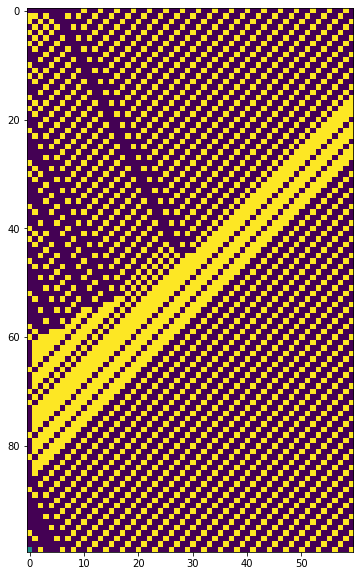

In [93]:
# same logic with 2c - 1

r2 = fast_R(N, v2)
traj_fast2 = r_2_traj_fast(r2, N)
np2 = new_position2(r2, traj_fast2, v2)
s_v, s_r = r_v_matrix(v2,r2,traj_fast2, T)



import matplotlib.pylab as plt 
fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))

ax1.imshow(s_r[:,:T])

plt.show()

    When there are cars between (60, 85], there are whole block on the road about 20 cars at every time.  On the other hand, when there is no cars between that interval, the cars could move more smoothly compared to previous model. There are also some blocks in this model but it could be fine, because they are very small congestion and there are some gaps between congestion. It would be much better compared to previous model. 
    
    The reason they have different model, we put more cars on question 2c-1 compared to 2c-2. So, it is obvious that the first one have heavy traffic congestion.

3) By running the simulation up to $T = 100$, calculate the average velocity of the cars at this final time.

In [94]:
# this function is quite similar logic with r_v_matrix() function.

def Traj_F(r, F_Traj, vel, T):
    '''
    Return new whole matrix of all trajectories.
    '''
    
    r2 = r
    F_Traj2 = F_Traj
    
    F_Traj = new_position2(r, F_Traj, vel)
    r = new_updateR(F_Traj)
    s = np.row_stack((F_Traj2, F_Traj))
    
    
    for i in range(T-2):        
        # above 'for loop', we get a matrix with two rows. => repeat as much as T-2
        
        F_Traj = new_position2(r, F_Traj, vel)
        r = new_updateR(F_Traj)
        s = np.row_stack((s, F_Traj))
        
    return np.transpose(s)


T = 100
u = Traj_F(r2, traj_fast2, v2, T)
print(u)

[[  2.   2.   3. ...  98.  99. 100.]
 [  3.   4.   5. ... 100. 101. 102.]
 [  5.   6.   7. ... 102. 103. 104.]
 ...
 [ 83.  84.  85. ... 180. 181. 182.]
 [ 89.  90.  91. ... 186. 187. 188.]
 [ 97.  98.  99. ... 194. 195. 196.]]


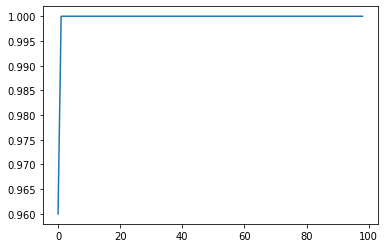

In [95]:
average = ave_vel(u, T)
#print(average)

plt.plot(range(T-1),average)
plt.show()

It would not take that much to reach final average speed. Around T = 1 or 2, it reaches to final average speed.